C:\Users\admin\AppData\Local\Temp\ipykernel_15168\3543494334.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])
C:\Users\admin\AppData\Local\Temp\ipykernel_15168\3543494334.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[bool_columns] = df_cleaned[bool_columns].astype(int)


Decision Tree:
Validation Accuracy: 0.758
Test Accuracy: 0.7532
              precision    recall  f1-score   support

        Good       0.69      0.71      0.70      2611
        Poor       0.75      0.75      0.75      4399
    Standard       0.78      0.77      0.77      7990

    accuracy                           0.75     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.75      0.75      0.75     15000



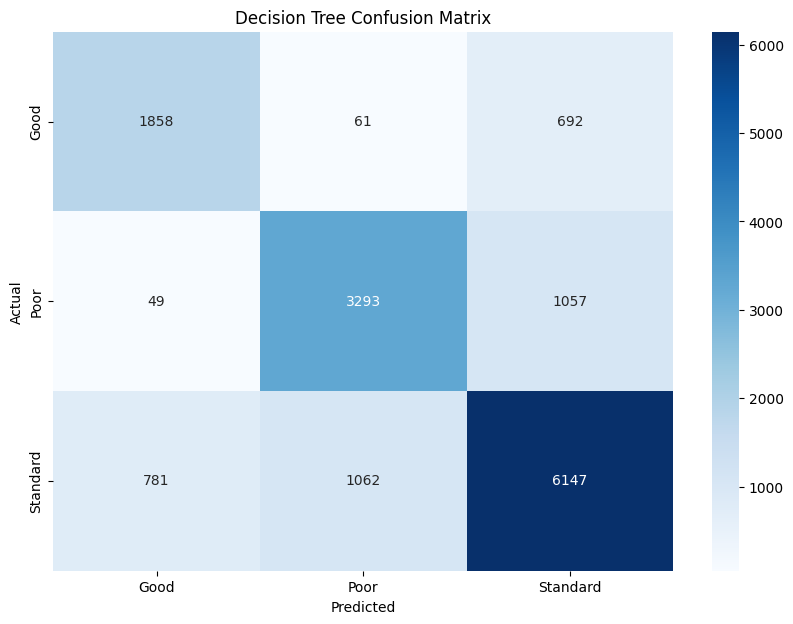


Random Forest:
Validation Accuracy: 0.8041333333333334
Test Accuracy: 0.8058
              precision    recall  f1-score   support

        Good       0.76      0.77      0.76      2611
        Poor       0.79      0.83      0.81      4399
    Standard       0.83      0.81      0.82      7990

    accuracy                           0.81     15000
   macro avg       0.79      0.80      0.80     15000
weighted avg       0.81      0.81      0.81     15000



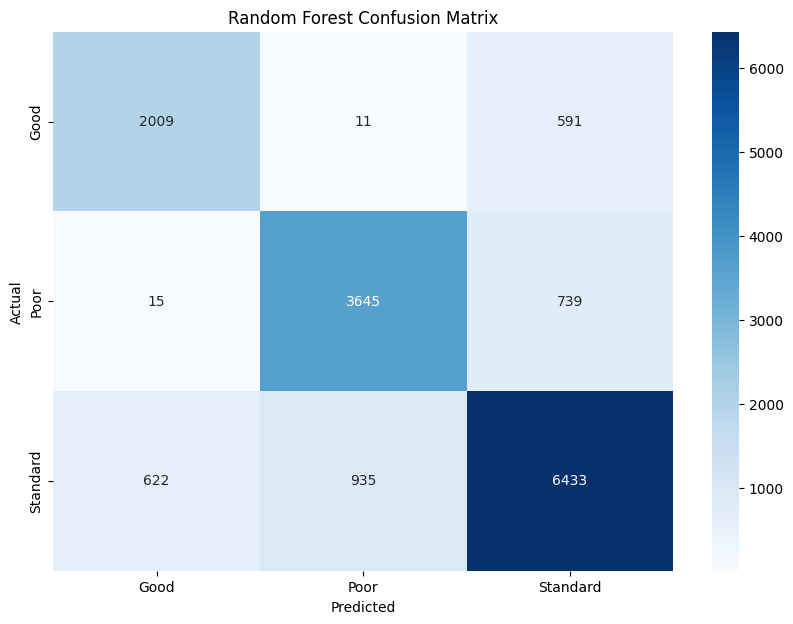


K-Nearest Neighbors (KNN):
Validation Accuracy: 0.7724666666666666
Test Accuracy: 0.7756
              precision    recall  f1-score   support

        Good       0.69      0.74      0.71      2611
        Poor       0.76      0.80      0.78      4399
    Standard       0.81      0.77      0.79      7990

    accuracy                           0.78     15000
   macro avg       0.76      0.77      0.76     15000
weighted avg       0.78      0.78      0.78     15000



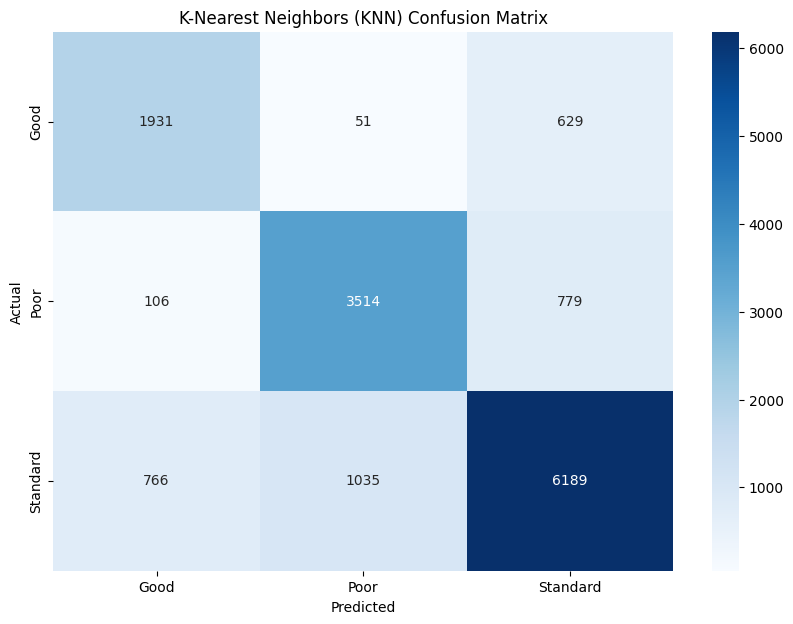


Support Vector Machine (SVM):
Validation Accuracy: 0.6936
Test Accuracy: 0.6884666666666667
              precision    recall  f1-score   support

        Good       0.54      0.74      0.63      2611
        Poor       0.69      0.65      0.67      4399
    Standard       0.76      0.69      0.72      7990

    accuracy                           0.69     15000
   macro avg       0.66      0.70      0.67     15000
weighted avg       0.70      0.69      0.69     15000



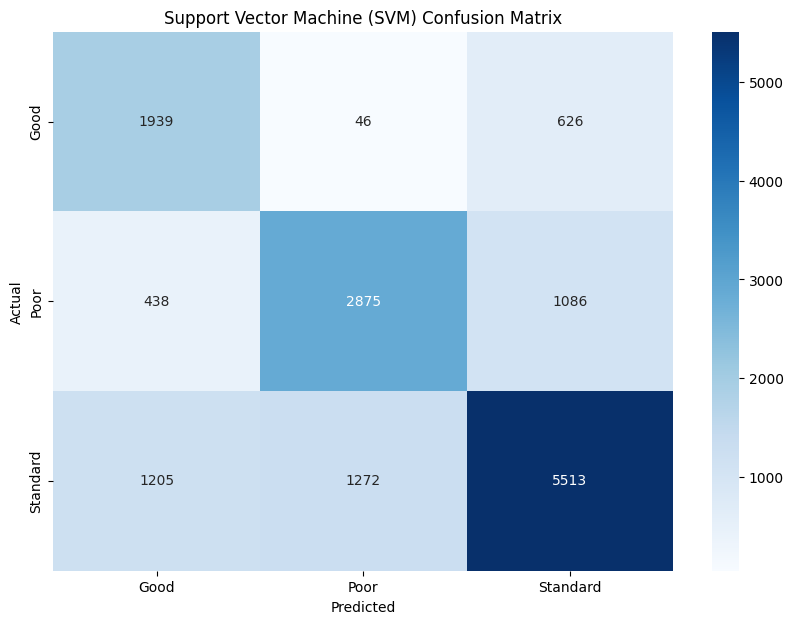


Logistic Regression:
Validation Accuracy: 0.6369333333333334
Test Accuracy: 0.6392666666666666
              precision    recall  f1-score   support

        Good       0.54      0.71      0.61      2611
        Poor       0.62      0.49      0.55      4399
    Standard       0.69      0.70      0.69      7990

    accuracy                           0.64     15000
   macro avg       0.62      0.63      0.62     15000
weighted avg       0.64      0.64      0.64     15000



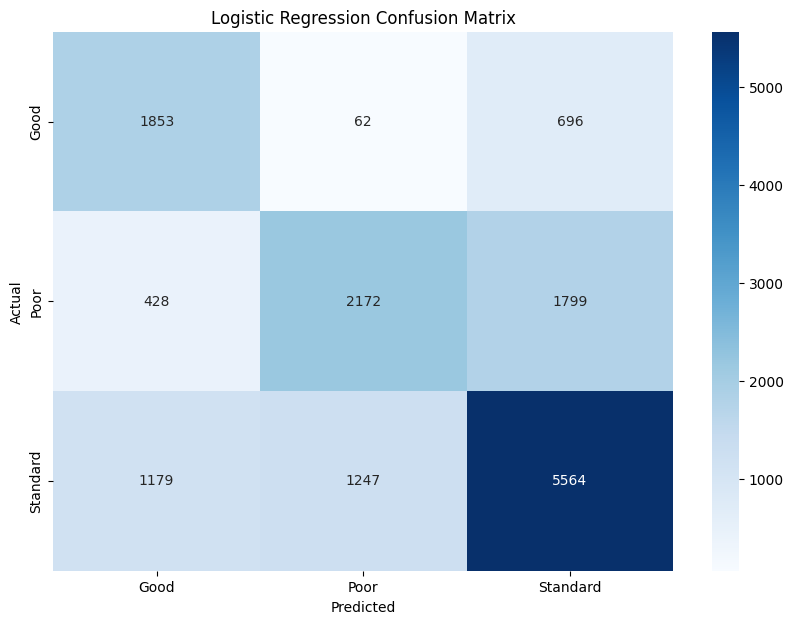

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../train.csv")

# Drop unnecessary columns
df = df.drop(columns=['ID', 'Customer_ID', 'Month', 'Age', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Credit_Utilization_Ratio'])

# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, columns=['Credit_Score', 'Credit_Mix'])

# Check for duplicates in the DataFrame and remove them
df_cleaned = df.drop_duplicates()

# Standardize numeric columns
scaler = StandardScaler()
numeric_columns = ["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Outstanding_Debt", "Credit_History_Age", 
                   "Monthly_Balance"]
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

# Convert boolean columns to integer
bool_columns = df_cleaned.select_dtypes(include=['bool']).columns
df_cleaned[bool_columns] = df_cleaned[bool_columns].astype(int)

# Separate features (X) and target variable (y)
X = df_cleaned.drop(columns=['Credit_Score_Good', 'Credit_Score_Poor', 'Credit_Score_Standard'])
y = df_cleaned[['Credit_Score_Good', 'Credit_Score_Poor', 'Credit_Score_Standard']]

# Convert y to a single column with labels (0, 1, 2) representing Good, Poor, and Standard
y = y.idxmax(axis=1).map({'Credit_Score_Good': 0, 'Credit_Score_Poor': 1, 'Credit_Score_Standard': 2})

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Decision Tree
print("Decision Tree:")
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy}')
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy}')
print(classification_report(y_test, test_predictions, target_names=['Good', 'Poor', 'Standard']))
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Poor', 'Standard'], yticklabels=['Good', 'Poor', 'Standard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Random Forest
print("\nRandom Forest:")
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy}')
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy}')
print(classification_report(y_test, test_predictions, target_names=['Good', 'Poor', 'Standard']))
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Poor', 'Standard'], yticklabels=['Good', 'Poor', 'Standard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN):")
model = KNeighborsClassifier()
model.fit(X_train, y_train)
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy}')
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy}')
print(classification_report(y_test, test_predictions, target_names=['Good', 'Poor', 'Standard']))
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Poor', 'Standard'], yticklabels=['Good', 'Poor', 'Standard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-Nearest Neighbors (KNN) Confusion Matrix')
plt.show()

# Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM):")
model = SVC(random_state=42)
model.fit(X_train, y_train)
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy}')
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy}')
print(classification_report(y_test, test_predictions, target_names=['Good', 'Poor', 'Standard']))
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Poor', 'Standard'], yticklabels=['Good', 'Poor', 'Standard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Support Vector Machine (SVM) Confusion Matrix')
plt.show()

# Logistic Regression
print("\nLogistic Regression:")
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy}')
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy}')
print(classification_report(y_test, test_predictions, target_names=['Good', 'Poor', 'Standard']))
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Poor', 'Standard'], yticklabels=['Good', 'Poor', 'Standard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
